In [ ]:
!pip install cmake
!pip install face_recognition

^C


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def from_camera():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cap.release()
    plt.imshow(frame)
    plt.show()
    return frame

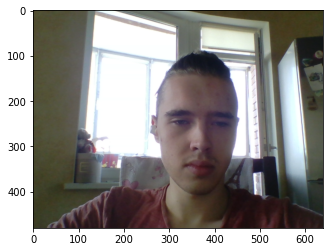

In [3]:
import face_recognition
import pickle

# Take a foto of yourself with a camera. Or load from file

image = from_camera()  # face_recognition.load_image_file('your_photo.jpg')

In [5]:
face_locations = face_recognition.face_locations(image)
print("Detect with HoG:", face_locations)
face_locations2 = face_recognition.face_locations(image, model='cnn')
print("Detect with CNN:", face_locations2)

embeddings = face_recognition.face_encodings(image, known_face_locations=face_locations2)
print("Embedding size:", embeddings[0].shape)

Detect with HoG: [(180, 448, 366, 262)]
Detect with CNN: [(146, 473, 349, 269)]
Embedding size: (128,)


In [6]:
import base64

s = base64.b64encode(embeddings[0].tostring())
print(s)

# TODO: sumbit the string you get here to common chat

b'AAAAwIjzqL8AAADARY22PwAAAACihcQ/AAAAwN8EtL8AAABgt+2+vwAAAMBCWJg/AAAAoKVAt78AAAAAynihvwAAAIBovLA/AAAAAMNUwb8AAACgGlzOPwAAAIBqtr2/AAAAoAPvzr8AAADAZsWAPwAAAAB7LoK/AAAA4PuYvD8AAAAAPO68vwAAAIByu7m/AAAAAFFZjT8AAAAgwBmgvwAAAAD3IsA/AAAAgKfIoz8AAABAScC2vwAAAIBVQqw/AAAA4C2Cw78AAADA1p3TvwAAAEB5isC/AAAAwLNlur8AAABABwawvwAAAAAkJb+/AAAAABcdYL8AAACAsIqlPwAAAEBoNLy/AAAAAEzGlL8AAACAqLWXvwAAAAAcyp0/AAAAwDp8rL8AAACA+DOwvwAAAOB5YsI/AAAAwOQsdD8AAABgQOC/vwAAAICXUKo/AAAAQO1Tlz8AAABAC+3OPwAAAGB57cQ/AAAAwGvrtz8AAAAAoFF6PwAAAIBUMIG/AAAAwFClvz8AAABguAbQvwAAAIBLH6g/AAAAwMCJxD8AAACAsNe7PwAAAMAQObw/AAAAwIJysz8AAADAbybAvwAAACByjqA/AAAAQIamwD8AAACAqrPKvwAAAOAQ/bs/AAAAQJmymj8AAADgR+bAvwAAAEApz7I/AAAA4ASJtb8AAACA6LrIPwAAAMBGCqw/AAAAYOuaur8AAACA5bi5vwAAAICPXcc/AAAAwC90vr8AAAAAWhfCvwAAAACZrIS/AAAA4Ieexb8AAADgvq/EvwAAAECYlNG/AAAAoN5UtD8AAAAA8iTUPwAAAADVIcQ/AAAAgLFWy78AAAAAS0qjPwAAAADgBIG/AAAAgGRfm78AAADApLOoPwAAACBbGrM/AAAAYGZ1oj8AAAAAInG7vwAAAOCD/qu/AAAAgAGrjL8AAABAeYfIPwAAAED4Pa6/AAAAgGjjdz8AAABAVR7OPwAAAIBkpZW/AAAA4G

In [5]:
import base64
face_strings = [
    "AAAAwIjzqL8AAADARY22PwAAAACihcQ/AAAAwN8EtL8AAABgt+2+vwAAAMBCWJg/AAAAoKVAt78AAAAAynihvwAAAIBovLA/AAAAAMNUwb8AAACgGlzOPwAAAIBqtr2/AAAAoAPvzr8AAADAZsWAPwAAAAB7LoK/AAAA4PuYvD8AAAAAPO68vwAAAIByu7m/AAAAAFFZjT8AAAAgwBmgvwAAAAD3IsA/AAAAgKfIoz8AAABAScC2vwAAAIBVQqw/AAAA4C2Cw78AAADA1p3TvwAAAEB5isC/AAAAwLNlur8AAABABwawvwAAAAAkJb+/AAAAABcdYL8AAACAsIqlPwAAAEBoNLy/AAAAAEzGlL8AAACAqLWXvwAAAAAcyp0/AAAAwDp8rL8AAACA+DOwvwAAAOB5YsI/AAAAwOQsdD8AAABgQOC/vwAAAICXUKo/AAAAQO1Tlz8AAABAC+3OPwAAAGB57cQ/AAAAwGvrtz8AAAAAoFF6PwAAAIBUMIG/AAAAwFClvz8AAABguAbQvwAAAIBLH6g/AAAAwMCJxD8AAACAsNe7PwAAAMAQObw/AAAAwIJysz8AAADAbybAvwAAACByjqA/AAAAQIamwD8AAACAqrPKvwAAAOAQ/bs/AAAAQJmymj8AAADgR+bAvwAAAEApz7I/AAAA4ASJtb8AAACA6LrIPwAAAMBGCqw/AAAAYOuaur8AAACA5bi5vwAAAICPXcc/AAAAwC90vr8AAAAAWhfCvwAAAACZrIS/AAAA4Ieexb8AAADgvq/EvwAAAECYlNG/AAAAoN5UtD8AAAAA8iTUPwAAAADVIcQ/AAAAgLFWy78AAAAAS0qjPwAAAADgBIG/AAAAgGRfm78AAADApLOoPwAAACBbGrM/AAAAYGZ1oj8AAAAAInG7vwAAAOCD/qu/AAAAgAGrjL8AAABAeYfIPwAAAED4Pa6/AAAAgGjjdz8AAABAVR7OPwAAAIBkpZW/AAAA4Gu8pz8AAAAAbqymPwAAAAAs8nS/AAAAAMi7ub8AAAAAo+yBPwAAAIB5pLq/AAAAoOhXsj8AAADAnd+3vwAAAMCnALe/AAAAwB7rr78AAACgOAy/PwAAAECFfsW/AAAA4Bw1yD8AAABAakihvwAAAEAD96G/AAAAILk/wL8AAABABmOZPwAAAEDs0cW/AAAAYES4jD8AAABA4rzGPwAAACD0ENC/AAAAYHlOxT8AAACAW2nHPwAAAMBOarI/AAAAQOozwT8AAABAcrq2PwAAAAClXKo/AAAAgPgtnT8AAACgwx2nvwAAAMDruMy/AAAAQJD9vr8AAACADhq5PwAAAEAP4Jq/AAAAACtZj78AAADA0PqwPw==",
    "AAAAAILop78AAAAAoKo7vwAAACBpC8A/AAAAAHSmir8AAADg0XOyvwAAAABZ24q/AAAAgL2rob8AAABg/me2vwAAAIAXE7I/AAAA4FqLpb8AAABgNEbTPwAAAGCKi8K/AAAAgH9jzr8AAAAAL6+bvwAAAAC43ky/AAAAoLy0tD8AAAAg17nBvwAAAIBFnJq/AAAAYFA9t78AAAAAtkKpvwAAAADx6qQ/AAAAICflnD8AAACg5+OpPwAAAICTZaU/AAAAAGeYtb8AAADgXVDVvwAAAIAZxMC/AAAAwOzZw78AAABg5gGnPwAAAMBpALS/AAAA4Fy6ob8AAABAd+SsPwAAAIClRru/AAAAAPIHr78AAAAAGHlAPwAAAEDGWrE/AAAAgFZBsr8AAACAACHBvwAAAGC2YM4/AAAAgFenrL8AAAAAs5jDvwAAAAAPqoO/AAAAgLM7sD8AAAAghq/MPwAAAKBcG8Y/AAAAwK2FsT8AAAAAtAJzPwAAAIBBU4+/AAAAwC1LuD8AAAAgo4PPvwAAAIBmFb4/AAAA4PuTwz8AAABA9SjEPwAAAIADR7I/AAAAQAtFuT8AAADAPpG7vwAAAACEDqs/AAAAoIimtj8AAAAAu9fIvwAAAABGz7Q/AAAAoM9msz8AAADghtS3vwAAAID9DZk/AAAAwCnKsL8AAAAAGXfJPwAAAADhY8A/AAAAYB86ub8AAADAEZe2vwAAAAAnsbw/AAAAQKD6wb8AAACAqje+vwAAAGBU5LE/AAAAAImHyL8AAABAr7DJvwAAAMDLDtO/AAAAoMJ5qT8AAADAgXPbPwAAAMBih78/AAAAQI1ky78AAABANTqfPwAAAADuZow/AAAAIPCItb8AAACArQi9PwAAAKCwt8E/AAAAAIHCm78AAADgwc59vwAAACAFJ7q/AAAAQIjipD8AAACApTLGPwAAAKB3NLe/AAAAQH7Bsr8AAABAdLzKPwAAAICZxKC/AAAAQNxtoz8AAAAAMlWxPwAAAAAFz5g/AAAAoC66iL8AAAAAMDJRPwAAAIAiIMC/AAAAgJEAqD8AAADg1OC7PwAAAEDpY6a/AAAAYMFmpb8AAAAAs4CfPwAAAACWVcO/AAAAwDWQwj8AAABAxtSAvwAAAICYG62/AAAAAM3Hgr8AAABAz/G9vwAAAEBeM8C/AAAAgLJfsD8AAACAQWrOPwAAAGA3B9G/AAAAoLPixD8AAADg1iHAPwAAAIB5pas/AAAAoPWbwT8AAAAALHSxPwAAAAAzlq4/AAAAAGwDoT8AAACAteWivwAAAEDf2su/AAAAwBqluL8AAACgMyG1PwAAAAA4b30/AAAAgHhPsz8AAADAWj2rPw==",
    "AAAAIPBctb8AAADA6kOmPwAAAID+07U/AAAAYMiTt78AAACAbKe+vwAAAADRAYS/AAAAoK5ltr8AAABAR0GzvwAAAEAap70/AAAAoE1Fwb8AAABALj/KPwAAAEDPdLC/AAAAIK/Yx78AAAAAaTubPwAAAAAUX5C/AAAAwJSLyj8AAABgTUDFvwAAACA/PMS/AAAAwCPHsb8AAAAAoZmivwAAAABxY68/AAAAgMEclT8AAAAg1++wvwAAAOAAdrc/AAAAgGRcx78AAABAM2nSvwAAAKAlJbC/AAAAQKXrmr8AAADAIhd7vwAAAEDUl7i/AAAAANRcXD8AAABAbXfCPwAAAMAp/7i/AAAAwFw4sT8AAAAglcSwPwAAAACvV8A/AAAAAPormr8AAACAd+DBvwAAAEBmZ8o/AAAAQCDDkr8AAACABxDUvwAAAIDaJam/AAAAwH4WwT8AAAAAKCHHPwAAAMBB0s4/AAAAAJXtnz8AAAAA5N5xPwAAAAA396u/AAAAQNZWwD8AAABAjFHPvwAAAICbccE/AAAAYD4Xwz8AAADgXw6IPwAAAIBZtME/AAAAAOvDpj8AAAAASGPEvwAAAAAwBW8/AAAAIDgmxT8AAAAAEiLKvwAAAEBTea+/AAAAwF91sT8AAAAAzYPBvwAAAOCf0JK/AAAAgCJ2wb8AAAAAHGTDPwAAAGA3mMc/AAAAgMonvL8AAADg7HLKvwAAAODscs0/AAAAwNM+y78AAABAbmTFvwAAAICaXrU/AAAAoKkOwL8AAADgLA7AvwAAAIAI0dO/AAAAAGd6or8AAABAoPbUPwAAAGCOgMc/AAAAoHpwvb8AAACgLyOoPwAAAODhNKs/AAAAQBdRtL8AAACAnl2lPwAAAMDycsM/AAAAQHSxlT8AAAAAuZ+mvwAAAABs5pE/AAAAAKRom78AAAAglOfOPwAAAGDU2rA/AAAA4IiAmr8AAADAnJrKPwAAAAAVFoc/AAAAYIBCsr8AAACAcqubPwAAAMAktbE/AAAAwK8/pr8AAADANsGSvwAAAMBBKb2/AAAAQKWFrr8AAABA3cmovwAAAICryIM/AAAAADIwlb8AAAAAeTXGPwAAAACA88q/AAAAYL/szj8AAACAsASfvwAAAEBs56I/AAAAAPh9Vj8AAAAAUTOfPwAAAMBuTqW/AAAAAIyRk78AAAAgdQ/CPwAAAMAyJ86/AAAAQArxuT8AAABA9xjAPwAAAKAnrLs/AAAAIAw7vD8AAACggR+xPwAAAICoasA/AAAAACVMnj8AAADg6w+4vwAAAEDTIdG/AAAAgBSysr8AAABA/NmyPwAAAIC9fqm/AAAAACbprT8AAACAXPe5Pw==",
    "AAAAAI4ztr8AAADALIi+PwAAAEAmR60/AAAAgE+VqL8AAABgvmCivwAAAMCT06U/AAAAABZTar8AAAAAoHmKvwAAAEDJv74/AAAAoA8Ksr8AAAAAN8PNPwAAAABe+6q/AAAA4IgC0r8AAAAAyCJ/PwAAAADKWm6/AAAAYF3psj8AAACAWKDGvwAAAIAbl3q/AAAAQD3PvL8AAABgsYKqvwAAAICnybQ/AAAAwMkntj8AAADA67igPwAAAADuY58/AAAAQOq5uL8AAAAgWdHSvwAAAADuA66/AAAAoFKur78AAAAAq3V6PwAAACCgn7+/AAAAIMUVrz8AAAAA8qqjvwAAAICV776/AAAAACkLjL8AAACArv1zvwAAAIAoEoY/AAAAwCMev78AAAAAS/6gvwAAAAC/e8c/AAAAgDFyiz8AAABAvjLFvwAAAEB5was/AAAAwLbJkj8AAAAAHFTTPwAAAAAgCMU/AAAAwMZJvj8AAAAgh3O0vwAAACCEOKe/AAAAwL13sz8AAAAgePzQvwAAAMDycK4/AAAAAHF2xT8AAACAEL/BPwAAAOC0uqo/AAAAQIkTvD8AAAAgTpO7vwAAAACsyom/AAAAwMLhvT8AAAAAaATHvwAAAMCqE5Y/AAAA4NSIpz8AAABACaqwvwAAAECo0KY/AAAAAJc7vr8AAACAE03GPwAAAMCFKbc/AAAAIC/2wr8AAADgmsiwvwAAAKAQCsM/AAAA4NSTwb8AAAAgMFq3vwAAAOBE2q0/AAAAgPTvsr8AAACg1LnIvwAAAMDTAs2/AAAA4PQBoj8AAADAXbzWPwAAAABgDcc/AAAAIDovw78AAAAArpaZvwAAACDeIbC/AAAAABrngD8AAADAPImlPwAAAEBxarQ/AAAAQPfIub8AAABAihiqvwAAAIBKlIO/AAAAAABmaT8AAADAd564PwAAAACw2p2/AAAAAAa0tb8AAAAAZsHKPwAAAAAyS5w/AAAAgI1Xdr8AAACAemqjPwAAACDe0K+/AAAAQOaMtL8AAAAA6f6CvwAAAIDu2cC/AAAAAKF3kT8AAABgEUymvwAAAOD+jcC/AAAAwDwPmj8AAABA+724PwAAAEBU6Me/AAAA4Mbcyz8AAACAzR6nPwAAAAALYaW/AAAA4KISpz8AAACAZOS9PwAAAOAvgL2/AAAAAIASA78AAAAARLjCPwAAAOA80NW/AAAAgEW0yj8AAACgZUDGPwAAAMCjKaU/AAAAAF2qwj8AAADA2aKsPwAAAIDrHLw/AAAAwNl1hb8AAACA/COkPwAAAEAvvsW/AAAAwNMzwb8AAAAAij+lPwAAAACJJVg/AAAAQHg4tT8AAADASGKcPw==",
    "AAAAwG9wv78AAADAwfHAPwAAAKCAOa8/AAAAQJgwuL8AAABg0/u5vwAAAEC+iHO/AAAAQHb7pr8AAABg0aeyvwAAAMBl/Mc/AAAA4KkbwL8AAADAnqDPPwAAAMAjh7Q/AAAAgJgT0b8AAABAuXmZvwAAAAApxai/AAAAALxAwD8AAABg0wfLvwAAAMDXH76/AAAAwNwbij8AAAAAGz2nvwAAAEA5YME/AAAAoNgNuT8AAACgfZmkPwAAAOCfjLQ/AAAAwJkOur8AAABAPQXSvwAAAMA5YLa/AAAA4JHio78AAACgC9eRvwAAAKAvb6S/AAAAQPu7qD8AAABArKGyPwAAAACIYbO/AAAAANZ/lT8AAABgZBmJPwAAAADX9Z6/AAAA4K9Mub8AAADASfqsvwAAACCCBdE/AAAAANKDsD8AAADAHGfDvwAAAAAqFKE/AAAAAK55cD8AAACAYCnVPwAAAGA/XsM/AAAAQG/vgb8AAADA5LGsPwAAACA++sG/AAAAIEV+xD8AAAAAMDfRvwAAAMCItrM/AAAAQOmMzD8AAAAAmEG8PwAAAEAhkH4/AAAAoLpxsz8AAABg8CDDvwAAAECDUIC/AAAAwCR5wD8AAACg1VrLvwAAAKB+/7g/AAAAgMGcrj8AAAAg1PO3vwAAAEC+b5e/AAAAgNWnwb8AAADAuYfAPwAAAAAyu70/AAAAAM2twr8AAACAV2/LvwAAAMCN/cE/AAAAYLp4vL8AAADgmzvGvwAAAKDaZMA/AAAAQPiOyL8AAABAh5TIvwAAAECatdK/AAAAwJuclT8AAABgMK/XPwAAAMCu0sM/AAAAYMF9t78AAADA/uR/PwAAAIDuzqS/AAAAAK4vrb8AAABAhrGavwAAAMB46r4/AAAAoN5Xw78AAABAB220vwAAAOCtkbq/AAAAwANUrT8AAADALJ7BPwAAAMCywo8/AAAAoESMwb8AAADgu0/QPwAAAMBi3bQ/AAAAIBY7qj8AAABAo4mKPwAAAEA79bE/AAAAYCkZv78AAABAqyV9vwAAAODs3cS/AAAA4CY6or8AAAAAVmijvwAAAIC/tbC/AAAAIE5ReT8AAADg+IDFPwAAAOCRvMO/AAAA4ABNyz8AAABg1ACwvwAAAGCl84e/AAAAIIjKsr8AAAAgitSLPwAAAAD+f8S/AAAAQFTqnj8AAADg5Ee4PwAAACDp3Me/AAAAQF04wT8AAACAnX6+PwAAAADGdMc/AAAAQColvj8AAACAo9i2PwAAAMA3tYo/AAAAQBqdrL8AAABAfuKjvwAAAGC4Q8i/AAAAoGJ+r78AAACAyPqyPwAAAEADSXW/AAAAoCENuz8AAABgHTWiPw==",
    "AAAAAJ0Wi78AAACAgUW5PwAAAIBWZLY/AAAAwCtnnb8AAABAfmqzvwAAAKDii5w/AAAAwBg+l78AAACA+b2zvwAAAOB0QbQ/AAAAICoOnb8AAAAgkPu/PwAAAABSbGO/AAAAgJQ9z78AAADg5R22PwAAAGDSSsK/AAAAYGY7uD8AAAAgOnG4vwAAAAB8lqW/AAAAwBI3xr8AAAAgO8K8vwAAAADGJbA/AAAAAD3opD8AAAAgn4ikPwAAAIDl846/AAAAwMQtxb8AAABgom7HvwAAACBmh6+/AAAAYDC5ub8AAAAAUrKtvwAAAGDkDrm/AAAAoDnDsD8AAACAxgF4PwAAAKAUb8G/AAAAgH9kkr8AAAAAjVSHPwAAAECtfmc/AAAAYHPzvb8AAABAysezvwAAAOAGK8g/AAAAIJnCmT8AAAAgbYbBvwAAAKA6cMA/AAAAQK6AsT8AAAAgv7vTPwAAAIBaes0/AAAAYM4WoT8AAAAAJX6bPwAAAMCUTbK/AAAAoCLRwD8AAACgioDSvwAAAGD9MLQ/AAAAoMz0vj8AAADAr/S5PwAAAACCKME/AAAAwL/xsT8AAAAA4GnDvwAAAKDU9LE/AAAAgD7ivj8AAADA8G+/vwAAAGAwKLA/AAAAwLPatD8AAACA86e2vwAAAIB7CGW/AAAAAEaCk78AAABAs0nAPwAAAAAgA60/AAAAAD+Bvr8AAADAFuesvwAAAOCX/MM/AAAAQD+gvL8AAACAv3BnvwAAAGB0HZY/AAAAgJsHwb8AAACge6bFvwAAACACIcy/AAAA4EHGtz8AAAAgOYHZPwAAAABMMsQ/AAAAQFjow78AAAAAeeyKvwAAAKDqsr6/AAAAoAsktz8AAABAOryRPwAAACAQepA/AAAA4CJcsr8AAACgrKizvwAAAED5IKu/AAAAYNDKpj8AAABgGZzGPwAAAGAPk72/AAAAgDc4rr8AAACAu/XKPwAAAKAXDrM/AAAAYLX3vL8AAABAWpeiPwAAAIBo5qQ/AAAAgLeuw78AAAAAjNh9PwAAACCfWcO/AAAAgMUkoj8AAAAAJfNSvwAAAIBtMb6/AAAAgG2WiT8AAABAszCyPwAAAIBEZsq/AAAAwM7lyD8AAAAANGZfvwAAAAArdbG/AAAA4IZckL8AAACAZtp8vwAAAADDhMG/AAAAAPjCUT8AAABg7HHIPwAAAKC73s2/AAAAQJX1xz8AAACgTkvJPwAAAIBQEqo/AAAAQH0VwT8AAACAXuW4PwAAAMCyV7Q/AAAAAEnXjT8AAACAYI2pPwAAAMDtpLy/AAAAAFRpvr8AAABgy1OoPwAAAGCi1a0/AAAAQOcngb8AAADgteOpPw==",
    "AAAAwHr8pL8AAADgR6mzPwAAAMAY2ps/AAAAQISGnr8AAACArSm3vwAAAGBTkWq/AAAAAPZ0e78AAADAL42vvwAAAKBj+s4/AAAAgPadvb8AAABAPofRPwAAAAD5n5c/AAAAAC3+zb8AAADA+mmovwAAAEANO5K/AAAAwLYQwz8AAABAA0ygvwAAAKCPL7+/AAAAQJUxp78AAACADlV2vwAAAMD0TaM/AAAAIGloqz8AAAAA8rSTPwAAAECLarE/AAAAQE6Tsr8AAADALkDWvwAAAODowsC/AAAAgA5Wsb8AAADgloa1PwAAAIBtubq/AAAAIICwmr8AAACAYeijPwAAAEB1PcG/AAAAII/JuL8AAABA05GnPwAAAMDxdrQ/AAAAwHPjwr8AAACAfkyyvwAAAAA5es4/AAAAwEfymD8AAADA2LjIvwAAAMCOEHS/AAAAoPihqb8AAABgzJTRPwAAAIBm7rg/AAAAwLUZiz8AAADArUi3PwAAAAC6mby/AAAAAI8aZ78AAACARELLvwAAAGDjZcA/AAAAQCUywz8AAACAZKTEPwAAAEA/KcA/AAAAwNjGdj8AAADAaI/EvwAAAGDayJk/AAAAQMmeyT8AAABgJ6TQvwAAACBiHb4/AAAAwEiDtj8AAADgjg6xvwAAAKCKiIq/AAAAQBvbmD8AAADg5AXHPwAAAIBw4cA/AAAAgJcbwb8AAAAA+sO9vwAAAGBcbMQ/AAAAgBw2x78AAABAUDmAPwAAAIDBpro/AAAAYE9lvr8AAABgZjLSvwAAAMBlyMi/AAAAgNiMtD8AAABgST3aPwAAACDekck/AAAA4Ax9xr8AAAAgIRyqvwAAAADC7Z+/AAAAwFKJhj8AAADA5Iy3PwAAAMDsVbM/AAAAYPfbpb8AAAAAw8m1vwAAAODDrrG/AAAAwCszpT8AAACAYITCPwAAAABJAHS/AAAAQJh+sr8AAAAAuWLMPwAAAGDp56A/AAAAQEOHpz8AAADAiLShPwAAAGCodrw/AAAAQFnaeL8AAABAaA6TPwAAAGCnO6y/AAAAoOXyoj8AAADgoPmRvwAAAMDCpLi/AAAAAED2ej8AAACAuYexPwAAAODfK7+/AAAAgF4Azj8AAADA3RaKPwAAAAD4ATe/AAAAQLmJlD8AAACgVpCuPwAAAKBUtra/AAAAII9Qsr8AAAAgKGrGPwAAAMCeoM+/AAAA4Fjuzz8AAADgR7DHPwAAAGDng5A/AAAAYLDGyD8AAAAAB52hPwAAAEAdYL8/AAAAIIKYoz8AAABAoCnDvwAAACB5Fsa/AAAAIGC4qb8AAABgNUCPPwAAAADcB5a/AAAAQLNbtj8AAACAB2mSPw==",
    "AAAAoAUunr8AAABgWzCkPwAAAOA3gZE/AAAAoFdUpb8AAABgO+2/vwAAAEAXJZq/AAAAgIJpoz8AAADAoUmrvwAAAMB88sA/AAAAwBdKhL8AAABAGG7MPwAAAEB5zb2/AAAA4DELzb8AAABAGMmnvwAAAACQbIa/AAAAgE6duT8AAABAZkHIvwAAAMAgU7a/AAAAQHsrob8AAABggMCqvwAAAOBzZq8/AAAAgA0Mkz8AAADABuefPwAAAIAJj74/AAAAYAS0rb8AAADgqc3UvwAAAMBPbsS/AAAAwOVDx78AAAAAxJ2rPwAAAODrf8C/AAAAQCiYf78AAABApgu8PwAAAKC4Y8W/AAAAAHn1u78AAACAaD9lPwAAAGBLXZe/AAAAoJq2rb8AAABgEk23vwAAAEBaC8w/AAAAQHiNr78AAADgk93AvwAAAGB7Ppg/AAAAYIT3tD8AAABgqqnQPwAAAGArP84/AAAAIHD0sT8AAABgT1quvwAAAKBQhLK/AAAA4DNCwD8AAACAqHrJvwAAAECPzbk/AAAAoIoExj8AAABAnJCzPwAAACCYysA/AAAAoMhcqT8AAABA9t+8vwAAAGDZibI/AAAAgKRcvT8AAAAANM7OvwAAAEBmtLE/AAAA4DIhqj8AAABA7y+1vwAAAMBKb6g/AAAAIDLBsb8AAABADmjFPwAAAMBaPrQ/AAAAAFP0ob8AAACgOCjDvwAAAAA76Lw/AAAAIFvryb8AAAAAm3C0vwAAAOADfrg/AAAAYNc3xr8AAAAgY1rGvwAAAODXKtG/AAAAALGgpz8AAADg1yfUPwAAAIDpysI/AAAA4GGXwr8AAABAL1ChPwAAAAAgyJW/AAAAwKTGpr8AAABgwXi+PwAAAIDdu5Y/AAAAwESFsr8AAAAADh+4vwAAAEBuK7+/AAAAwCsqqD8AAABAY/7EPwAAAADzwae/AAAAAMAWpb8AAABA+fTPPwAAAKA5K6y/AAAAABWnZz8AAACA3Dq6PwAAAMC7O7Y/AAAAAE3tpr8AAABAa/eqPwAAAKCqlsO/AAAAoB8gpz8AAABAtzu1PwAAAOBZ/Ly/AAAAQOxBpL8AAACA1OyyPwAAAEBZe8a/AAAAQEmeuD8AAACAEuWgvwAAAAAo2Sc/AAAAYE5NtL8AAAAAUsK9vwAAAMCtOMS/AAAA4AbGsT8AAABAZ9/MPwAAAIDCV9C/AAAAQF+d0D8AAAAAftq5PwAAAAAaT1S/AAAAgB//vz8AAACgbPOLPwAAACABxbM/AAAA4BJCt78AAADAK6TEvwAAAKCWp8m/AAAAwEpOkb8AAACgp/HFPwAAACAhM6A/AAAAYAxKsj8AAADg6MGZPw==",
]

names = [
    "Myself",
    "Protas",
    "Aelita",
    "Dima Grigoryev",
    "Alek",
    "Danila",
    "Dima Turenko"
    "Aidar"
]

face_embeddings = [
    np.frombuffer(base64.b64decode(s), dtype=float) for s in face_strings
]

# check
face_recognition.compare_faces(face_embeddings, face_embeddings[0], tolerance = 0.5)

[True, False, False, False, False, False, False, False]

## TODO
1. Switch on your camera in zoom.
2. When everyone is online, take a screenshot.
3. Load an image with `face_recognition.load_image_file`.
4. Detect all faces on the image using `face_recognition.compare_faces`.
5. Draw bounding boxes and write names on a screenshot.
6. Submit result to chat.

In [7]:
group = face_recognition.load_image_file("group_photo.png")
encodings = face_recognition.face_encodings(group)
found = [face_recognition.compare_faces(face_embeddings, x, tolerance=0.5) for x in encodings]
locations = face_recognition.face_locations(group)

In [8]:
print(locations)

[(116, 1178, 223, 1071), (397, 755, 526, 626), (116, 1628, 206, 1539), (125, 769, 254, 640), (411, 1228, 540, 1099), (82, 325, 211, 196), (391, 253, 546, 98), (641, 294, 749, 187)]


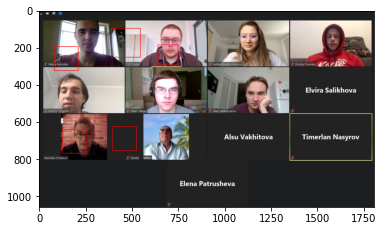

In [10]:
color = (255, 0, 0) 
thickness = 2
for loc in locations:
    group = cv2.rectangle(group, (loc[0], loc[3]), (loc[2], loc[1]), color, thickness)
plt.imshow(group)
plt.show()